In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta
import pandas as pd
import xgcm
import pooch

%matplotlib inline

# Download the data
And organise the data structures to give time series that can easily analysed and plotted.

## Pacific Decadal Oscillation

downloaded from https://www.ncei.noaa.gov/access/monitoring/pdo/


In [2]:
fname_pdo = pooch.retrieve(
    url="https://www.ncei.noaa.gov/pub/data/cmb/ersst/v5/index/ersst.v5.pdo.dat",
    known_hash=None,
)


In [3]:
# pdo = pd.read_csv('climate-indices/ersst.v5.pdo.txt', skiprows=1, delim_whitespace=True)
pdo = pd.read_csv(fname_pdo, skiprows=1, delim_whitespace=True)
column_names = pdo.columns

pdo = pd.melt(pdo, id_vars=['Year'], var_name=['Month'])
pdo['Date'] = pd.to_datetime(pdo['Year'].astype(str) + '-' + pdo['Month'].astype(str))
pdo = pdo.sort_values(by=['Date']).drop(columns=['Month', 'Year']).reset_index(drop=['index'])
pdo = pdo.set_index('Date')
pdo = pdo.rename(columns={'value':'PDO'})


## Interdecadal Pacific Oscillation (IPO)
Downloaded from https://psl.noaa.gov/data/timeseries/IPOTPI/


In [4]:
fname_ipo = pooch.retrieve(
    url="https://psl.noaa.gov/data/timeseries/IPOTPI/tpi.timeseries.ersstv5.data",
    known_hash=None,
)


In [5]:

ipo = pd.read_csv(fname_ipo, skiprows=1, nrows=169, delim_whitespace=True, names=column_names)

ipo = pd.melt(ipo, id_vars=['Year'], var_name=['Month'])
ipo['Date'] = pd.to_datetime(ipo['Year'].astype(str) + '-' + ipo['Month'].astype(str))
ipo = ipo.sort_values(by=['Date']).drop(columns=['Month', 'Year']).reset_index(drop=['index'])
ipo = ipo.set_index('Date')
ipo = ipo.rename(columns={'value':'Interdecadal Pacific Oscillation'})



## SAM
Downloaded from https://legacy.bas.ac.uk/met/gjma/sam.html


In [6]:
fname_sam = pooch.retrieve(
    url="http://www.nerc-bas.ac.uk/public/icd/gjma/newsam.1957.2007.txt",
    known_hash=None,
)



In [7]:

sam = pd.read_csv(fname_sam, skiprows=1, delim_whitespace=True, names=column_names)

sam = pd.melt(sam, id_vars=['Year'], var_name=['Month'])
sam['Date'] = pd.to_datetime(sam['Year'].astype(str) + '-' + sam['Month'].astype(str))
sam = sam.sort_values(by=['Date']).drop(columns=['Month', 'Year']).reset_index(drop=['index'])
sam = sam.set_index('Date')
sam = sam.rename(columns={'value':'Southern Annular Mode'})


## SOI - Southern Oscillation index
Downloaded from https://www.ncei.noaa.gov/access/monitoring/enso/soi


In [8]:
fname_soi = pooch.retrieve(
    url="https://www.cpc.ncep.noaa.gov/data/indices/soi",
    known_hash=None,
)

In [9]:

soi = pd.read_csv(fname_soi, skiprows=3, nrows=72, delim_whitespace=True)


soi = pd.melt(soi, id_vars=['YEAR'], var_name=['Month'])
soi['Date'] = pd.to_datetime(soi['YEAR'].astype(str) + '-' + soi['Month'].astype(str))
soi = soi.sort_values(by=['Date']).drop(columns=['Month', 'YEAR']).reset_index(drop=['index'])
soi = soi.set_index('Date')
soi = soi.rename(columns={'value':'Southern Oscillation Index'})


## AMO 
Downloaded from https://psl.noaa.gov/data/timeseries/AMO/


In [10]:
fname_amo = pooch.retrieve(
    url="https://psl.noaa.gov/data/correlation/amon.us.long.data",
    known_hash=None,
)



In [11]:

#unsmoothed
amo = pd.read_csv(fname_amo, skiprows=1, nrows=167, delim_whitespace=True, names=column_names)
amo
amo = pd.melt(amo, id_vars=['Year'], var_name=['Month'])
amo['Date'] = pd.to_datetime(amo['Year'].astype(str) + '-' + amo['Month'].astype(str))
amo = amo.sort_values(by=['Date']).drop(columns=['Month', 'Year']).reset_index(drop=['index'])
amo = amo.set_index('Date')
amo = amo.rename(columns={'value':'Atlantic Multi-decadal Oscillation '})

# # smoothed
# amo_smoothed = pd.read_csv('climate-indices/amon.sm.long.txt', nrows=167, delim_whitespace=True)

# amo_smoothed = pd.melt(amo_smoothed, id_vars=['Year'], var_name=['Month'])
# amo_smoothed['Date'] = pd.to_datetime(amo_smoothed['Year'].astype(str) + '-' + amo_smoothed['Month'].astype(str))
# amo_smoothed = amo_smoothed.sort_values(by=['Date']).drop(columns=['Month', 'Year']).reset_index(drop=['index'])
# amo_smoothed = amo_smoothed.set_index('Date')
# amo_smoothed = amo_smoothed.rename(columns={'value':'AMO_smoothed'})



# amo_smoothed.drop(amo_smoothed[amo_smoothed['AMO_smoothed']< -90].index, inplace=True)

## IOD 
Downloaded from  https://stateoftheocean.osmc.noaa.gov/sur/ind/dmi.php


In [12]:
fname_iod = pooch.retrieve(
    url="https://stateoftheocean.osmc.noaa.gov/sur/data/dmi.nc",
    known_hash=None,
)


In [13]:

iod = xr.open_dataset(fname_iod)
iod = iod.to_dataframe()
iod = iod.rename(columns={'DMI':'Indian Ocean Dipole'})


# Smooth the indices

In [14]:
# smooth the indices
years_to_smooth = 2

ipo = ipo.rolling(years_to_smooth*12, center=True).mean()
sam = sam.rolling(years_to_smooth*12, center=True).mean()
soi = soi.rolling(years_to_smooth*12, center=True).mean()
iod = iod.rolling(years_to_smooth*12, center=True).mean()
amo = amo.rolling(years_to_smooth*12, center=True).mean()

# mask within +/- 0.5 standard deviations of zero
ipo = ipo.where(ipo.abs() > 0.5*ipo.std())
sam = sam.where(sam.abs() > 0.5*sam.std())
soi = soi.where(soi.abs() > 0.5*soi.std())
iod = iod.where(iod.abs() > 0.5*iod.std())
amo = amo.where(amo.abs() > 0.5*amo.std())


# shift the indices for plotting
ipo = (np.sign(ipo)*0.5 - 0.0)
sam = (np.sign(sam)*0.5 - 0.1)
soi = (np.sign(soi)*0.5 - 0.2)
iod = (np.sign(iod)*0.5 - 0.3)
amo = (np.sign(amo)*0.5 - 0.4)

# Plot the indices

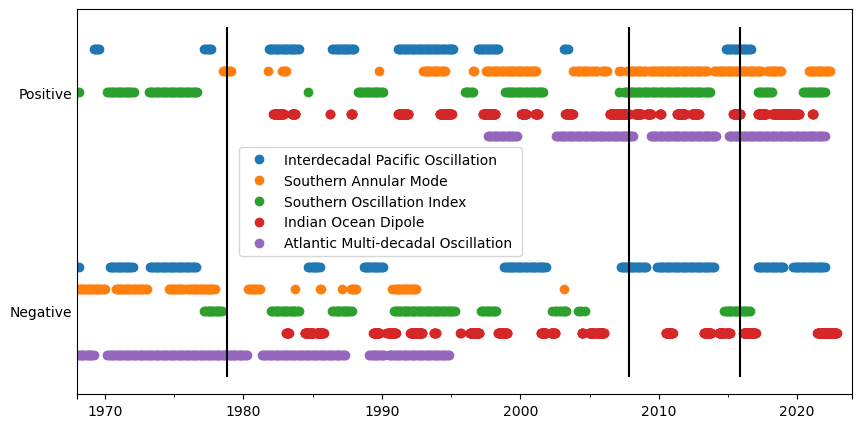

In [15]:

plt.figure(figsize=(10,5))
ax = plt.gca()

ipo.plot(marker='o', linewidth=0, ax=ax)
sam.plot(marker='o', linewidth=0, ax=ax)
soi.plot(marker='o', linewidth=0, ax=ax)
iod.plot(marker='o', linewidth=0, ax=ax)
amo.plot(marker='o', linewidth=0, ax=ax)
# amo_smoothed.plot(ax=ax)

# ax.set_yticks(
plt.yticks(ticks=[-0.7, 0.3], labels=['Negative', 'Positive'])
ax.yaxis.set_tick_params(length=0)

plt.xlim('1968', '2024')
plt.xlabel('')
# plt.hlines(0, '1970', '2023', color='k')

plt.vlines(['1978-11', '2007-11', '2015-12'], -1, 0.6, color='k')

plt.legend(loc='center left', bbox_to_anchor=(0.2, 0.5))

plt.savefig('climate-indices.png', dpi=200, bbox_inches='tight')
# plt.barh(2, np.timedelta64(1800, 'Y'),left='1995-01-01', height=0.2)
# plt.barh(2, np.timedelta64(1800, 'Y'),left='1995-01-01', height=0.2)